To test for leakage between the training and testing data, use np.random.rand as the dataset and that you get chance classification.
- Garbage in garbage out

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# def get_data(num_data_pnts, mu1, mu2, plot):
#     """
#     Generate data for classification
#     """
    
#     d1 = np.random.randn(num_data_pnts, mu1.size) + mu1.T
#     d2 = np.random.randn(num_data_pnts, mu2.size) + mu2.T
    
#     if plot:
#         plt.figure()
#         plt.scatter(d1[:,0], d1[:,1], label="class 1")
#         plt.scatter(d2[:,0], d2[:,1], label="class 2")
#         plt.legend()
#         plt.xlabel("var 1")
#         plt.ylabel("var 2")
#         plt.show()
    
#     return d1, d2

def get_data(num_data_pnts, mu1, mu2, plot):
    """
    Generate data for classification
    """
    
    tmp1 = np.random.randn(num_data_pnts, 1) + mu1[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu1[1]
    d1 = np.hstack((tmp1, tmp2))
    
    tmp1 = np.random.randn(num_data_pnts, 1) + mu2[0]
    tmp2 = np.random.randn(num_data_pnts, 1) + mu2[1]
    d2 = np.hstack((tmp1, tmp2))

    if plot:
        plt.figure()
        plt.scatter(d1[:,0], d1[:,1], label="class 1")
        plt.scatter(d2[:,0], d2[:,1], label="class 2")
        plt.legend()
        plt.xlabel("var 1")
        plt.ylabel("var 2")
        plt.show()
    
    return d1, d2

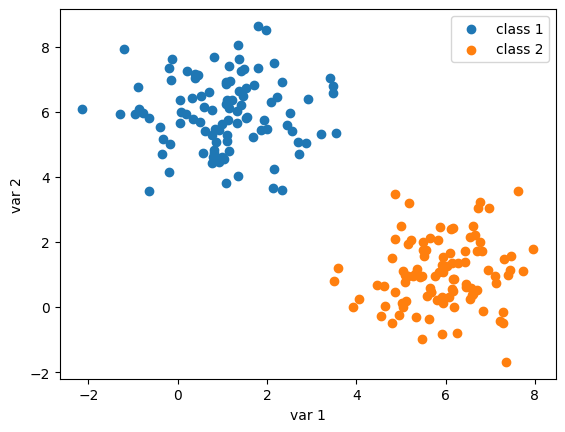

In [3]:
np.random.seed(8)
num_data_pnts = 100
mu1 = np.array([1, 6]).reshape(-1,1)
mu2 = np.array([6, 1]).reshape(-1,1)

d1, d2 = get_data(num_data_pnts, mu1, mu2, plot=True)

In [4]:
print(f"Cond1 mean: {np.mean(d1)}")
print(f"Cond2 mean: {np.mean(d2)}")

print(f"Cond1 mean: {np.mean(d1, axis=0)}")
print(f"Cond2 mean: {np.mean(d2, axis=0)}")

Cond1 mean: 3.513081304480811
Cond2 mean: 3.473680129135825
Cond1 mean: [1.06161002 5.96455258]
Cond2 mean: [5.92380764 1.02355262]


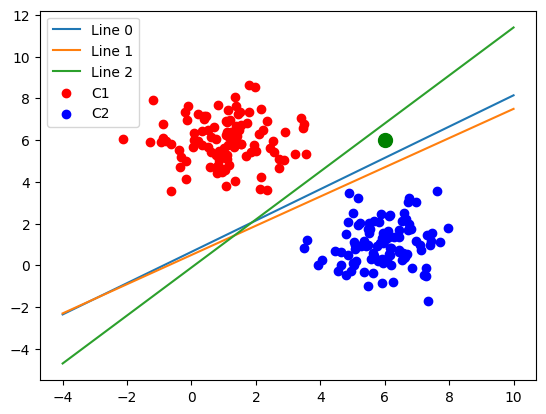

In [5]:
x_range = [-4, 10]
x_vals = np.linspace(x_range[0], x_range[1])

for a, (m,c) in enumerate([(0.75, 0.65), (0.7, 0.5), (1.15, -0.1)]):
    plt.plot(x_vals, m*x_vals+c, label="Line "+str(a))

plt.plot(6, 6, "go", markersize=10)
plt.scatter(d1[:, 0], d1[:, 1], color="r", label="C1")
plt.scatter(d2[:, 0], d2[:, 1], color="b", label="C2")
plt.legend()
plt.show()

In [6]:
# Training the SVM
fraction_train = 0.9
r, c = d1.shape

n_train = int(np.round(fraction_train*r))
d_train = np.vstack((d1[:n_train, :], d2[:n_train, :]))
y_train = np.hstack((np.zeros(n_train), np.ones(n_train)))

d_test = np.vstack((d1[n_train:, :], d2[n_train:, :]))
y_test = np.hstack((np.zeros(r-n_train), np.ones(r-n_train)))

In [7]:
y_train.shape, y_test.shape, d_train.shape, d_test.shape

((180,), (20,), (180, 2), (20, 2))

In [8]:
model = SVC(kernel="linear", C=1)
model.fit(d_train, y_train)
ypred_train = model.predict(d_train)
ypred_test = model.predict(d_test)

In [9]:
acc_train = accuracy_score(y_train, ypred_train)
acc_test = accuracy_score(y_test, ypred_test)

print(f"Training Accuracy: {acc_train};\nTest Accuracy: {acc_test}")

Training Accuracy: 1.0;
Test Accuracy: 1.0


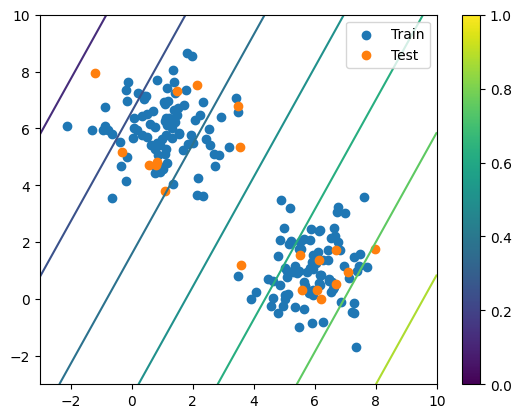

In [10]:
x = np.linspace(-3, 10)
y = np.linspace(-3, 10)

xx, yy = np.meshgrid(x, y)
xy = np.vstack((xx.ravel(), yy.ravel())).T
z = model.decision_function(xy)
z = z.reshape(xx.shape)

plt.contour(xx, yy, z)
# plt.contourf(xx, yy, z)
plt.scatter(d_train[:, 0], d_train[:, 1], label="Train")
plt.scatter(d_test[:, 0], d_test[:, 1], label="Test")
plt.legend()
plt.colorbar()
plt.show()

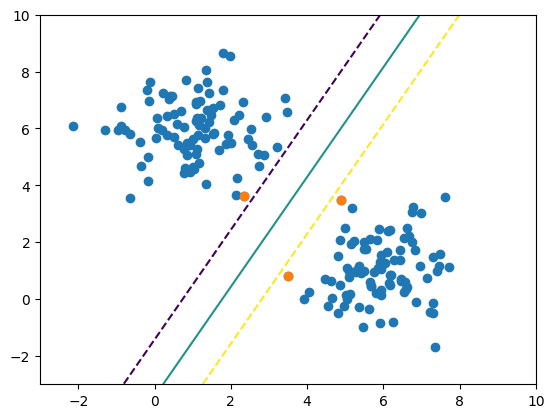

In [11]:
axis = plt.gca()
axis.contour(xx, yy, z, levels=[-0.8, 0, 0.8], linestyles=["--", "-", "--"])
axis.scatter(d_train[:, 0], d_train[:, 1])
axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1])
plt.show()

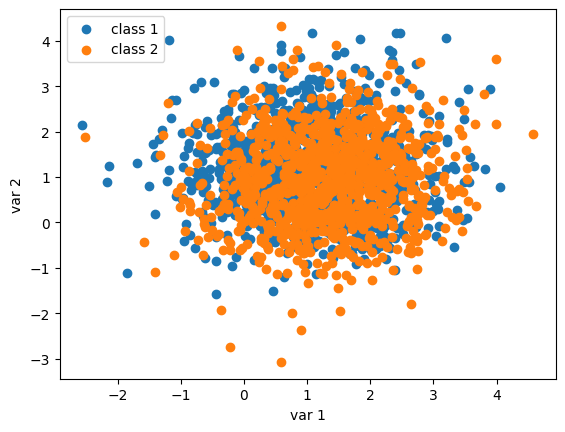

In [12]:
np.random.seed(8)
m1 = [1, 1.15]
m2 = [1.3, 1]
N = 1000

t1, t2 = get_data(N, m1, m2, plot=True)

In [13]:
# Training the SVM
fraction_train = 0.7
r, c = t1.shape

n_train = int(np.round(fraction_train*r))
t_train = np.vstack((t1[:n_train, :], t2[:n_train, :]))
ty_train = np.hstack((np.zeros(n_train), np.ones(n_train)))

t_test = np.vstack((t1[n_train:, :], t2[n_train:, :]))
ty_test = np.hstack((np.zeros(r-n_train), np.ones(r-n_train)))

In [14]:
ty_train.shape, ty_test.shape, t_train.shape, t_test.shape

((1400,), (600,), (1400, 2), (600, 2))

In [15]:
model = SVC(kernel="linear", C=1)
model.fit(t_train, ty_train)
ypred_train = model.predict(t_train)
ypred_test = model.predict(t_test)

In [16]:
acc_train = accuracy_score(ty_train, ypred_train)
acc_test = accuracy_score(ty_test, ypred_test)

print(f"Training Accuracy: {acc_train};\nTest Accuracy: {acc_test}")

Training Accuracy: 0.5735714285714286;
Test Accuracy: 0.5766666666666667


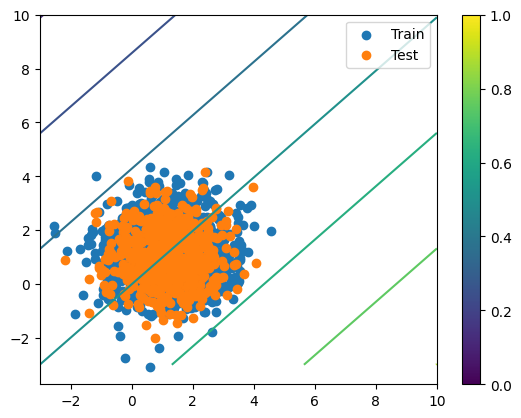

In [17]:
x = np.linspace(-3, 10)
y = np.linspace(-3, 10)

xx, yy = np.meshgrid(x, y)
xy = np.vstack((xx.ravel(), yy.ravel())).T
z = model.decision_function(xy)
z = z.reshape(xx.shape)

plt.contour(xx, yy, z)
# plt.contourf(xx, yy, z)
plt.scatter(t_train[:, 0], t_train[:, 1], label="Train")
plt.scatter(t_test[:, 0], t_test[:, 1], label="Test")
plt.legend()
plt.colorbar()
plt.show()

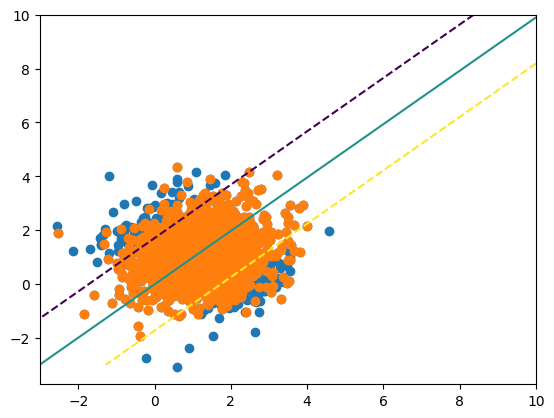

In [18]:
axis = plt.gca()
axis.contour(xx, yy, z, levels=[-0.8, 0, 0.8], linestyles=["--", "-", "--"])
axis.scatter(t_train[:, 0], t_train[:, 1])
axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1])
plt.show()